In [25]:
import random
import numpy as np
from numpy.random import choice
import networkx as nx
from itertools import combinations
import matplotlib.pyplot as plt
import collections
from statistics import variance
from statistics import mean
from scipy.special import binom 
import urllib.request
from statsmodels.distributions.empirical_distribution import ECDF
from scipy.special import factorial 
import seaborn as sns

random graph


In [26]:
def randomGraph(n,p):
    '''implementation of random graph'''
    graph = nx.Graph()
    if (p < 0 or p>1) or n%2 !=0:
        raise ValueError("wrong value of p or n. Remember p must be between [0,1] and n must be even")
    nodes = [v for v in range(n)]
    edges = set()
    for con_nodes in combinations(nodes,2): #every node with every node
        random_p = random.random()
        if random_p < p:
            edges.add(con_nodes)
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    return graph
def degree(graph):
    'return list of degree for each node'
    listOfDegrees = graph.degree()
    listOfDegreesOnly = []
    for i in range(len(listOfDegrees)):
        listOfDegreesOnly.append(listOfDegrees[i])
    return listOfDegreesOnly

example 1

In [27]:
N = 20
p = 0.3
myRandomGraph = randomGraph(N,p)
print('number of nodes: ', len(myRandomGraph.nodes))
print('number of edges: ', myRandomGraph.number_of_edges())
print('mean of degree: ',mean(degree(myRandomGraph)))
print('variance of degree: ', variance(degree(myRandomGraph)))

number of nodes:  20
number of edges:  62
mean of degree:  6.2
variance of degree:  3.536842105263158


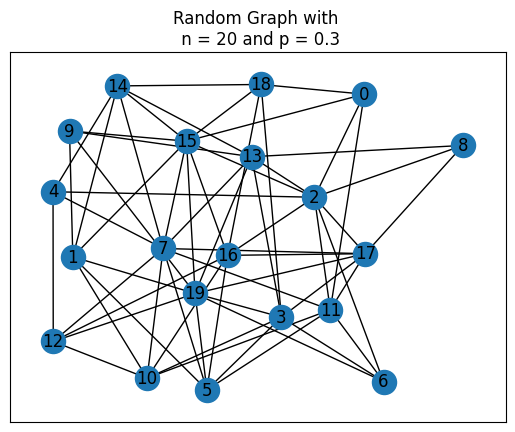

In [28]:
fig = plt.figure()
nx.draw_networkx(myRandomGraph)
plt.title('Random Graph with \n n = %i'%N + ' and p = %1.1f'%p )
plt.savefig('RandomGraph1.png', format = 'PNG')

exm2 

In [29]:
N2 = 20
p2 = 0.6
myRandomGraph2 = randomGraph(N2,p2)
print('number of nodes: ', len(myRandomGraph2.nodes))
print('number of edges: ', myRandomGraph2.number_of_edges())
print('mean of degree: ',mean(degree(myRandomGraph2)))
print('variance of degree: ', variance(degree(myRandomGraph2)))

number of nodes:  20
number of edges:  111
mean of degree:  11.1
variance of degree:  3.2526315789473683


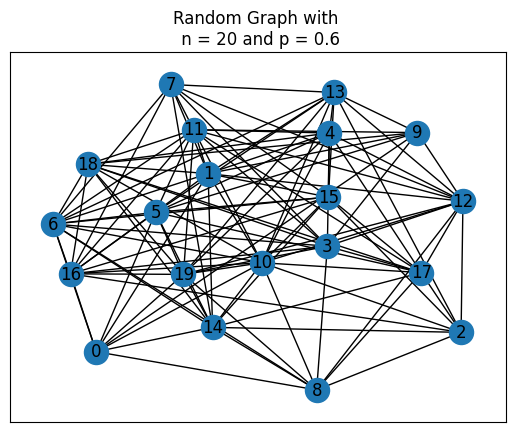

In [30]:
fig = plt.figure()
nx.draw_networkx(myRandomGraph2)
plt.title('Random Graph with \n n = %i'%N2 + ' and p = %1.1f'%p2 )
plt.savefig('RandomGraph2.png', format = 'PNG')

exm3

In [31]:
N3 = 20
p3 = 0.1
myRandomGraph3 = randomGraph(N3,p3)
print('number of nodes: ', len(myRandomGraph3.nodes))
print('number of edges: ', myRandomGraph3.number_of_edges())
print('mean of degree: ',mean(degree(myRandomGraph3)))
print('variance of degree: ', variance(degree(myRandomGraph3)))

number of nodes:  20
number of edges:  22
mean of degree:  2.2
variance of degree:  2.694736842105263


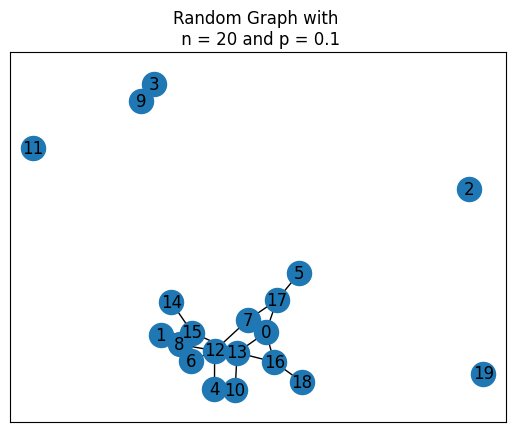

In [32]:
fig = plt.figure()
nx.draw_networkx(myRandomGraph3)
plt.title('Random Graph with \n n = %i'%N3 + ' and p = %1.1f'%p3 )
plt.savefig('RandomGraph3.png', format = 'PNG')

In [33]:
NFinal = 2000
pFinal = 0.08
myRandomGraphFinal = randomGraph(NFinal,pFinal)
print('number of nodes: ', len(myRandomGraphFinal.nodes))
print('number of edges: ', myRandomGraphFinal.number_of_edges())
print('mean of degree: ',mean(degree(myRandomGraphFinal)))
print('variance of degree: ', variance(degree(myRandomGraphFinal)))

number of nodes:  2000
number of edges:  159781
mean of degree:  159.781
variance of degree:  147.5187983991996


C:\Users\user\AppData\Local\Temp\ipykernel_4448\4139177396.py:6: RuntimeWarning: invalid value encountered in scalar multiply
  pk1[k-1] = binom(NFinal-1,k)*(pFinal**k)*(1-pFinal)**(NFinal-1-k)


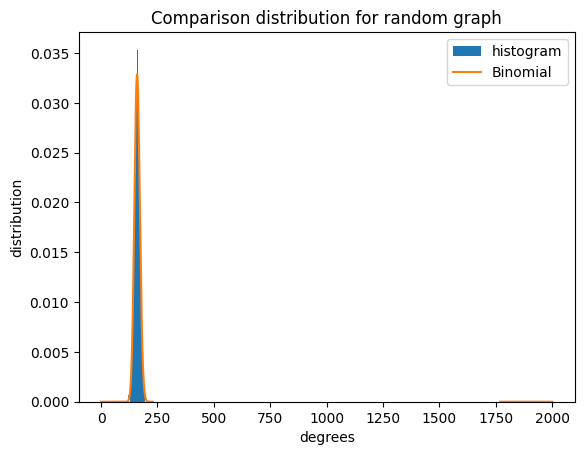

In [34]:
#binomial distribution 
kvals1 = np.arange(1,NFinal+1)
pk1 = np.zeros(NFinal,dtype=float)

for k in kvals1:
    pk1[k-1] = binom(NFinal-1,k)*(pFinal**k)*(1-pFinal)**(NFinal-1-k)

fig = plt.figure()
plt.hist(degree(myRandomGraphFinal),bins = 30,density = True, label = 'histogram')
plt.plot(kvals1, pk1, label = 'Binomial')
plt.legend()
plt.xlabel('degrees')
plt.ylabel('distribution')
plt.title('Comparison distribution for random graph')
plt.savefig('RandomGraphFianl.png', format = 'PNG')

## Watt-Strogatz model

In [35]:
def wattStrogatzModel(n,b,k):
    '''implementation of Watt-Strogatz model
    k-neighbors must be even, because we consider neighbours on the left side 
    and right side'''
    graph = nx.Graph()
    nodes = [v for v in range(n)]
    graph.add_nodes_from(nodes)
    if len(nodes) <= k or k%2 != 0 or (b<0 or b>1):
        raise ValueError('improper value of k or n, remeber k must be even')
    for node in nodes:
        for j in range(int(node-(k/2)),int(node+k/2-1)):
            if node!=j:
                graph.add_edge(node, nodes[j%len(nodes)])
    edges = graph.edges()

    for edge in edges:
        p = random.random()
        if p < b: #break the connection
            graph.remove_edge(edge[0],edge[1])
            e = edge[0]
            while(e == edge[0]) or ((edge[0],e) in graph.edges()) or (e == edge[1]):
                e = random.choice(nodes) 
            graph.add_edge(edge[0],e)
    return graph 
                

In [36]:
N1 = 20
b1 = 0.3
k1 = 4
myWattStrogatzModel1 = wattStrogatzModel(N1,b1,k1)
a1 = myWattStrogatzModel1.degree()
degrees1 = degree(myWattStrogatzModel1)
print('number of nodes: ', len(myWattStrogatzModel1.nodes))
print('number of edges: ', myWattStrogatzModel1.number_of_edges())
print('mean of degree: ',mean(degrees1))
print('variance of degree: ', variance(degrees1))

number of nodes:  20
number of edges:  40
mean of degree:  4
variance of degree:  1.4736842105263157


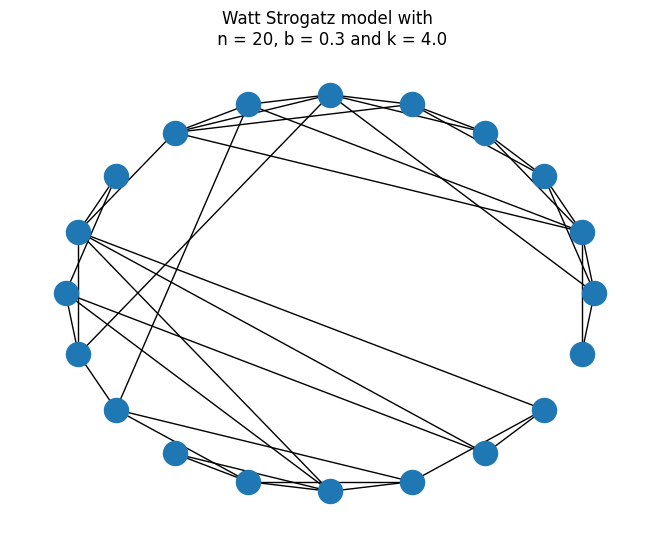

In [37]:
fig = plt.figure()
nx.draw_circular(myWattStrogatzModel1)
plt.title('Watt Strogatz model with \n n = %i'%N1 + ', b = %1.1f'%b1 + ' and k = %1.1f'%k1)
plt.savefig('WSGraph1.png', format = 'PNG')

In [38]:
N12 = 10
b12 = 0.2
k12 = 6
myWattStrogatzModel2 = wattStrogatzModel(N12,b12,k12)
degrees2 = degree(myWattStrogatzModel2)
print('number of nodes: ', len(myWattStrogatzModel2.nodes))
print('number of edges: ', myWattStrogatzModel2.number_of_edges())
print('mean of degree: ',mean(degrees2))
print('variance of degree: ', variance(degrees2))

number of nodes:  10
number of edges:  30
mean of degree:  6
variance of degree:  0.8888888888888888


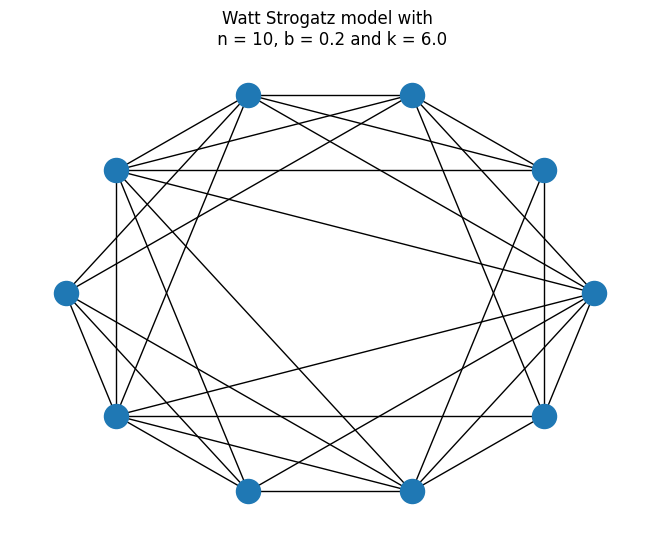

In [39]:
fig = plt.figure()
nx.draw_circular(myWattStrogatzModel2)
plt.title('Watt Strogatz model with \n n = %i'%N12 + ', b = %1.1f'%b12 + ' and k = %1.1f'%k12)
plt.savefig('WSGraph2.png', format = 'PNG')

In [40]:
N13 = 10
b13 = 0.05
k13 = 6
myWattStrogatzModel3 = wattStrogatzModel(N13,b13,k13)
degrees3 = degree(myWattStrogatzModel2)
print('number of nodes: ', len(myWattStrogatzModel3.nodes))
print('number of edges: ', myWattStrogatzModel3.number_of_edges())
print('mean of degree: ',mean(degrees3))
print('variance of degree: ', variance(degrees3))

number of nodes:  10
number of edges:  30
mean of degree:  6
variance of degree:  0.8888888888888888


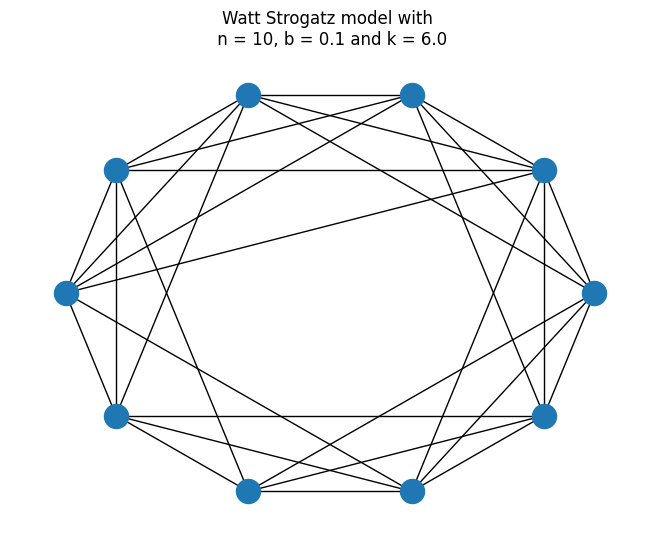

In [41]:
fig = plt.figure()
nx.draw_circular(myWattStrogatzModel3)
plt.title('Watt Strogatz model with \n n = %i'%N13 + ', b = %1.1f'%b13 + ' and k = %1.1f'%k13)
plt.savefig('WSGraph3.png', format = 'PNG')

In [42]:
N1Final = 1000
b1Final = 0.7
k1Final = 4
myWattStrogatzModelFinal = wattStrogatzModel(N1Final,b1Final,k1Final)
degrees = degree(myWattStrogatzModelFinal)

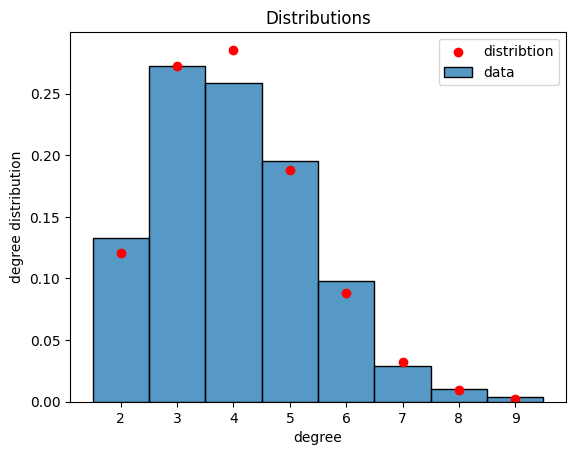

In [43]:
theo = []
for k in range(min(degrees), max(degrees)+1):
    y = int(min(k-2, 2))
    t = []
    for n in range(y+1):
        t.append(binom(2,n)*(1-b1Final)**n*b1Final**(2-n)*((b1Final*2)**(k-n-2))/(np.math.factorial(k-n-2))*np.exp(-b1Final*2))
    theo.append(sum(t))

x = np.linspace(min(degrees),max(degrees), len(theo))
#theo1 = watts_strogatz_degree_dist(x,b1Final,k1Final)
sns.histplot(x = degrees, discrete = True, stat = 'probability', label='data')
plt.scatter(x,theo, color='red', marker = 'o',label = 'distribtion')
plt.title("Distributions")
plt.xlabel('degree')
plt.ylabel('degree distribution')
plt.legend()
plt.show()

## Barabasi-Albert model 

In [44]:
def BarabasiAlbertModel(n,m):
    graph = nx.Graph()
    nodes = [v for v in range(m)]
    edges = set()
    for con_nodes in combinations(nodes,2): #nodes link together
        edges.add(con_nodes)
    graph.add_nodes_from(nodes)
    graph.add_edges_from(edges)
    for i in range(m,n):
        degreeOnly = []
        for node in graph.nodes:
            degreeOnly.append(graph.degree[node])
        sumOfDegrees = np.sum(degreeOnly)
        ki = random.random()*sumOfDegrees
        for x in range(0,i, i-1):
            counter = 0
            degreeNode = degreeOnly[0] #start from the first node
            while ki>degreeNode:
                degreeNode += degreeOnly[counter + 1]
                counter += 1
        graph.add_node(i)
        graph.add_edge(i, counter)
    return graph

In [45]:
N_BA1 = 10
m_BA1 = 6
myBAModel1 = BarabasiAlbertModel(N_BA1,m_BA1)
print('number of nodes: ', len(myBAModel1.nodes))
print('number of edges: ', myBAModel1.number_of_edges())
print('mean of degree: ',mean(degree(myBAModel1)))
print('variance of degree: ', variance(degree(myBAModel1)))

number of nodes:  10
number of edges:  19
mean of degree:  3.8
variance of degree:  5.066666666666666


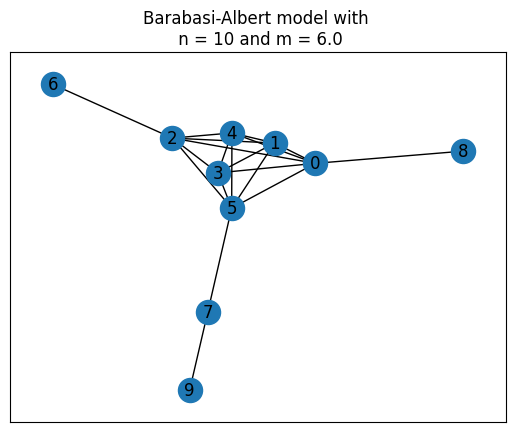

In [46]:
fig = plt.figure()
nx.draw_networkx(myBAModel1)
plt.title('Barabasi-Albert model with \n n = %i'%N_BA1 + ' and m = %1.1f'%m_BA1)
plt.savefig('BAGraph1.png', format = 'PNG')

In [47]:
N_BA2 = 20
m_BA2 = 6
myBAModel2 = BarabasiAlbertModel(N_BA2,m_BA2)
print('number of nodes: ', len(myBAModel2.nodes))
print('number of edges: ', myBAModel2.number_of_edges())
print('mean of degree: ',mean(degree(myBAModel2)))
print('variance of degree: ', variance(degree(myBAModel2)))

number of nodes:  20
number of edges:  29
mean of degree:  2.9
variance of degree:  9.778947368421052


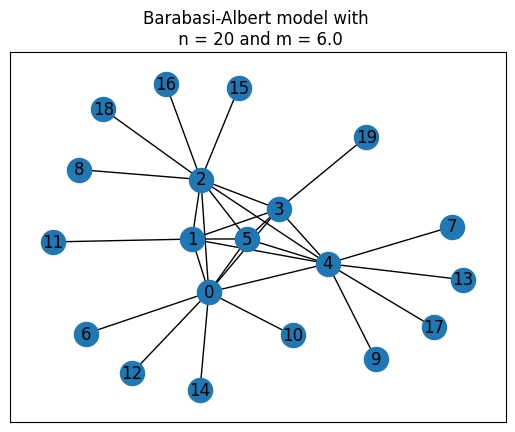

In [48]:
fig = plt.figure()
nx.draw_networkx(myBAModel2)
plt.title('Barabasi-Albert model with \n n = %i'%N_BA2 + ' and m = %1.1f'%m_BA2)
plt.savefig('BAGraph2.png', format = 'PNG')

In [49]:
N_BA3 = 50
m_BA3 = 4
myBAModel3 = BarabasiAlbertModel(N_BA3,m_BA3)
print('number of nodes: ', len(myBAModel3.nodes))
print('number of edges: ', myBAModel3.number_of_edges())
print('mean of degree: ',mean(degree(myBAModel3)))
print('variance of degree: ', variance(degree(myBAModel3)))

number of nodes:  50
number of edges:  52
mean of degree:  2.08
variance of degree:  6.932244897959183


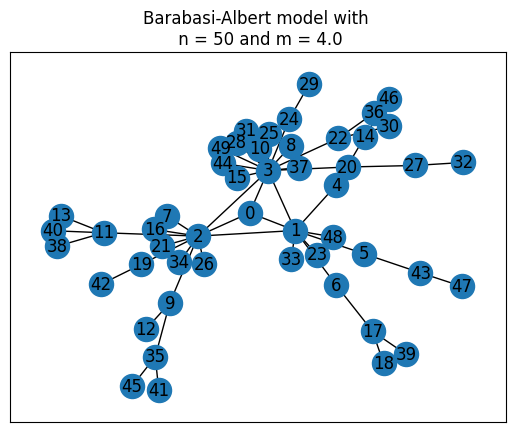

In [50]:
fig = plt.figure()
nx.draw_networkx(myBAModel3)
plt.title('Barabasi-Albert model with \n n = %i'%N_BA3 + ' and m = %1.1f'%m_BA3)
plt.savefig('BAGraph3.png', format = 'PNG')

In [51]:
N_BA = 2000
m_BA = 4
myBAModel = BarabasiAlbertModel(N_BA,m_BA)
print('number of nodes: ', len(myBAModel.nodes))
print('number of edges: ', myBAModel.number_of_edges())
print('mean of degree: ',mean(degree(myBAModel)))
print('variance of degree: ', variance(degree(myBAModel)))

number of nodes:  2000
number of edges:  2002
mean of degree:  2.002
variance of degree:  11.643817908954476


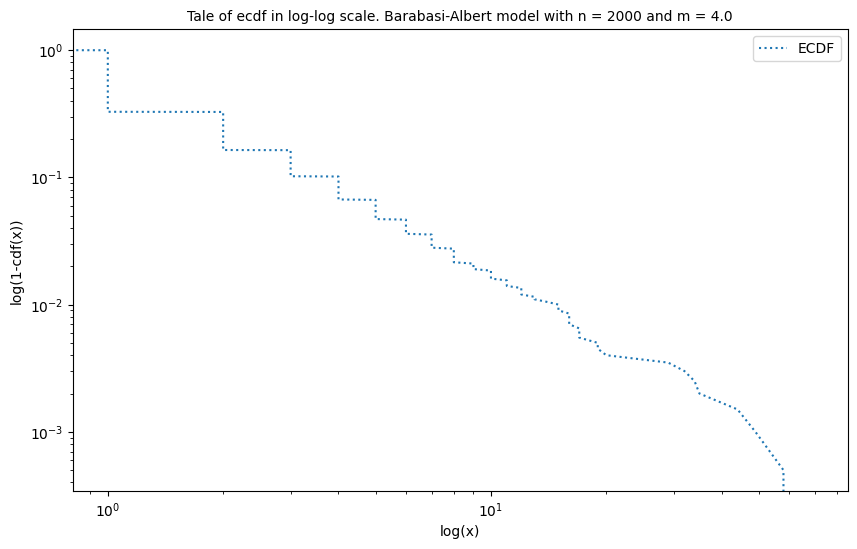

In [52]:
ecdf = ECDF(degree(myBAModel))

fig, ax = plt.subplots(figsize=(10,6))
ax.plot(ecdf.x, 1-ecdf.y, ':', label = "ECDF") #scatter plot 

plt.xlabel("log(x)")
plt.ylabel("log(1-cdf(x))")
ax.set_xscale("log", base = 10)
ax.set_yscale("log", base = 10)
plt.legend()
plt.title(r'Tale of ecdf in log-log scale. Barabasi-Albert model with n = %i'%N_BA  +  ' and m = %1.1f'%m_BA, fontsize=10)
plt.savefig('BAGraphFinal.png', format = 'PNG')

## Task2